In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable


In [3]:
upregulated = pd.read_csv("../../results/gene_enrichment_analysis/kegg_enrich_upregulated.csv")
downregulated = pd.read_csv("../../results/gene_enrichment_analysis/kegg_enrich_downregulated.csv")

In [10]:
upregulated.head()

,Unnamed: 0,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
0,ko03010,Genetic Information Processing,Translation,ko03010,Ribosome,32/175,54/1136,0.592593,3.846772,9.143054,3.044711e-14,1.979062e-12,1.922975e-12,K02874/K02950/K02963/K02909/K02946/K02890/K028...,32
1,ko02010,Environmental Information Processing,Membrane transport,ko02010,ABC transporters,39/175,138/1136,0.282609,1.834534,4.461426,2.519331e-05,8.187827e-04,7.955783e-04,K11720/K11074/K11075/K05846/K05847/K10112/K019...,39
2,ko00910,Metabolism,Energy metabolism,ko00910,Nitrogen metabolism,7/175,14/1136,0.500000,3.245714,3.606429,2.413852e-03,5.230013e-02,5.081794e-02,K01915/K00261/K15576/K15577/K26138/K01725/K15578,7
3,ko02024,Cellular Processes,Cellular community - prokaryotes,ko02024,Quorum sensing,11/175,40/1136,0.275000,1.785143,2.156397,3.297720e-02,5.358794e-01,5.206926e-01,K07667/K02053/K01997/K01999/K01995/K03073/K030...,11
4,ko02030,Cellular Processes,Cell motility,ko02030,Bacterial chemotaxis,6/175,18/1136,0.333333,2.163810,2.123012,4.559323e-02,5.927120e-01,5.759145e-01,K03413/K03407/K00575/K03412/K03408/K02556,6


In [5]:
sig_upregulated = upregulated[upregulated["p.adjust"] <= 0.05]
sig_downregulated = downregulated[downregulated["p.adjust"] <= 0.05]

In [101]:
counts_downregulated = sig_downregulated["GeneRatio"].apply(lambda x: int(x.split("/")[0])).to_list()
counts_pop_downregulated = sig_downregulated["BgRatio"].apply(lambda x: int(x.split("/")[0])).to_list()
ratio_downregulated = [x/y for x,y in zip(counts_downregulated, counts_pop_downregulated)]
labels_downregulated = sig_downregulated["Description"].to_list()
padjust_downregulated = sig_downregulated["p.adjust"].to_list()
id_downregulated = sig_downregulated["ID"].to_list()

counts_downregulated = [-x for x in counts_downregulated]


counts_upregulated = sig_upregulated["GeneRatio"].apply(lambda x: int(x.split("/")[0])).to_list()
counts_pop_upregulated  = sig_upregulated["BgRatio"].apply(lambda x: int(x.split("/")[0])).to_list()
ratio_upregulated = [x/y for x,y in zip(counts_upregulated, counts_pop_upregulated)]
labels_upregulated  = sig_upregulated["Description"].to_list()
padjust_upregulated = sig_upregulated["p.adjust"].to_list()
id_upregulated = sig_upregulated["ID"].to_list()

ids = id_downregulated + id_upregulated


counts = counts_downregulated + counts_upregulated
ratio = ratio_downregulated + ratio_upregulated
labels = labels_downregulated + labels_upregulated
labels = [x.replace("ko","") + " " + y for x,y in zip(ids, labels)]

pvals = padjust_downregulated + padjust_upregulated
marker_size = counts_pop_downregulated + counts_pop_upregulated


In [56]:
pcolors = pvals
norm_p_values = np.array(pcolors) / max(pcolors)
colors=plt.cm.RdBu_r(norm_p_values)

In [205]:
#marker_legend = np.linspace(min(marker_size), max(marker_size), num=6, endpoint=True, retstep=False, dtype=None)
#marker_legend = [int(x) for x in marker_legend]
marker_legend = marker_size
marker_legend = sorted(marker_legend, reverse=True)

In [206]:
sorted_markersize = sorted(np.array(marker_legend)*10, reverse=True)
sorted_markers = sorted(marker_legend, reverse=True)

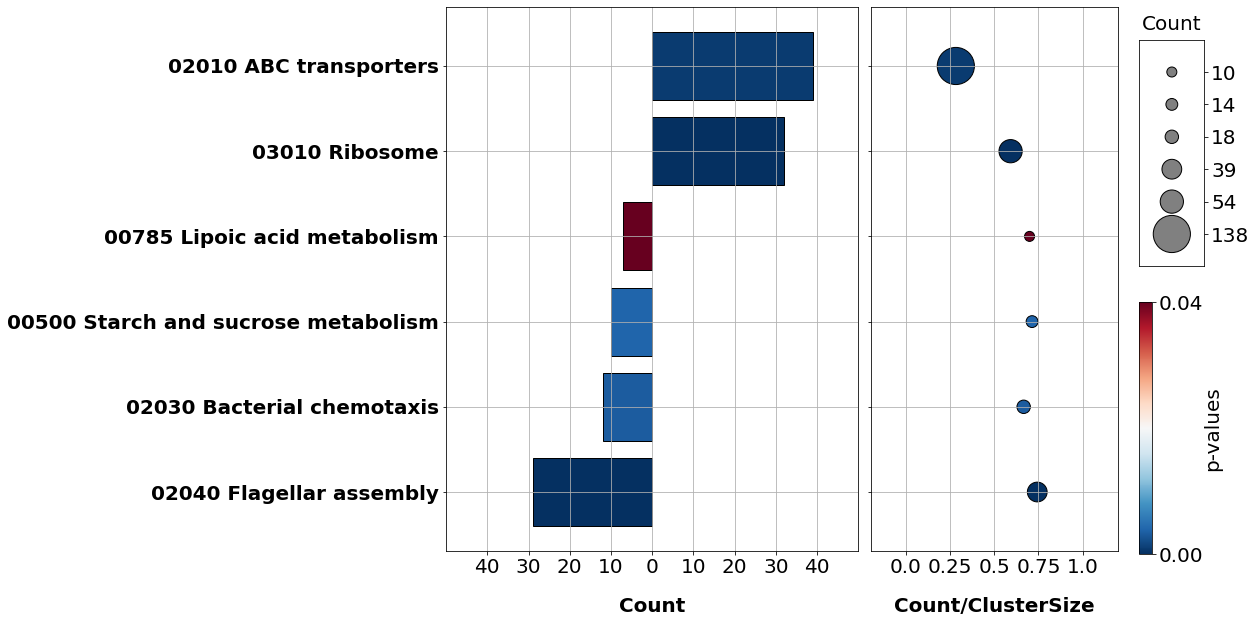

In [220]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10), sharey=False, gridspec_kw={'width_ratios': [2.5, 1.5, 0.5]})

ax1.sharey(ax2)

ax1.barh(labels,width=counts, color=colors, edgecolor="black")
ax2.scatter(y=[0,1,2,3,4,5], x=ratio, s=np.array(marker_size)*10, c=colors, cmap='RdBu_r', edgecolors="black")

ax1.set_xlim(-50,50)
#ax1.set_xticklabels(fontsize=16)
ax1.set_xticks([-40,-30,-20,-10,0,10,20,30,40])
ax1.set_xticklabels([40,30,20,10,0,10,20,30,40], fontsize=20)
ax1.set_yticks([0,1,2,3,4,5])
ax1.set_yticklabels(labels, fontsize=20, fontdict={'fontweight':"bold"})
ax1.set_xlabel("Count", fontsize=20, labelpad=20,  fontdict={'fontweight':"bold"})
ax1.grid()

ax2.set_xlim(-0.2,1.2)
ax2.set_xticks([0.0,0.25,0.5,0.75,1.0])
ax2.set_xticklabels([0.0,0.25,0.5,0.75,1.0], fontsize=20)
ax2.set_xlabel("Count/ClusterSize", fontsize=20, labelpad=20,  fontdict={'fontweight':"bold"})
ax2.tick_params(axis='y', labelleft=False)
ax2.grid()

plt.subplots_adjust(left=0.2, wspace=0.05)

cbar = fig.colorbar(ScalarMappable(cmap='RdBu_r'), ax=[ax1, ax2], pad = 0.005)
cbar.set_label('p-values',fontsize=20, labelpad=0)
cbar.set_ticks([min(norm_p_values), max(norm_p_values)])
cbar.set_ticklabels([f'{min(pvals):.2f}', f'{max(pvals):.2f}'])
cbar.ax.tick_params(labelsize=20)

cbar.ax.set_position([0.735, 0.12, 0.03, 0.35])

ax3.set_position([0.735, 0.52, 0.05, 0.315])
ax3.scatter(x=[0.5 for i in labels], y=[0,1,2,3,4,5], s=sorted_markersize, color="grey", edgecolor="black")
ax3.set_yticks([0,1,2,3,4,5])
ax3.set_yticklabels(sorted_markers, fontsize=20)
ax3.set_xlim(0,1)
ax3.set_ylim(-1,6)
ax3.tick_params(axis='y', labelright=True, labelleft=False)
ax3.tick_params(axis='x', labelbottom=False)
ax3.set_xticks([])
ax3.yaxis.tick_right()   
ax3.set_title("Count", pad=10, fontsize=20)
#ax3.grid()
#ax3.axis("off")
plt.savefig("../../results/gene_enrichment_analysis/up_down_combined.jpg", dpi=400)
#plt.tight_layout()

In [211]:
help(ax3.xaxis.tick_bottom)

Help on method tick_bottom in module matplotlib.axis:

tick_bottom() method of matplotlib.axis.XAxis instance
    Move ticks and ticklabels (if present) to the bottom of the axes.

